# Mushroom classification 🍄

In this project, we will use a public dataset from kaggle.com, the “Mushroom Classification” dataset, and try to figure out if a mushroom is edible or not. This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as edible or poisonous. When it comes to mushrooms, there is no simple rule for determining the edibility.

We will tackle this classification problem using logistic regression, ridge classifier, decision tree, Naive Bayes, and neural networks. After comparing the results of each model, we will find out the best performing one. 


## Importing the required libraries

As always we’ll start with importing the required libraries.

📌 Use the keywords "import" and "from".

In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier and Random Forest models
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Classification Report function
from sklearn.metrics import classification_report

## Dataset and preprocessing

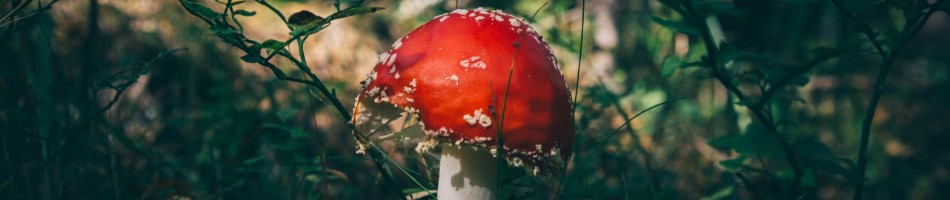

The dataset includes data from 8124 mushrooms. Each of  these mushroom samples have 22 features and they are categorized as edible or poisonous.

### Read the data

Let’s read the .csv file.

📌 Use the read_csv() function of the Pandas library.

In [3]:
# Read the "mushrooms.csv" file
data = pd.read_csv("mushrooms.csv")

###Visualize the data
Then, take a look at the dataset using *data.head()* function.

In [4]:
# Use the head() function to display the first 5 rows of the data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now, to have a better understanding of the dataset, we can utilize some visualization techniques. For example, by creating a bar graph, we can compare the different classes.

We’ll start with finding the number of samples per class.

📌 Use the value_counts() method.

In [5]:
# Use value_counts method on "class" column of data object
classes = data["class"].value_counts()

# Print the result
classes

e    4208
p    3916
Name: class, dtype: int64

With this information, we can create bars for each class and display the graph.

📌 Use the .bar() method to create the graph.

📌 Don't forget to use plt.show().

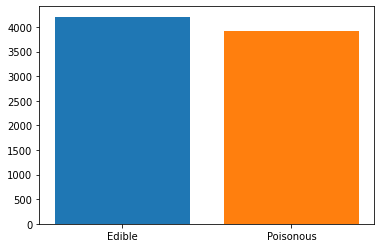

In [7]:
# Add the bar for edible class
plt.bar('Edible',classes['e'])

# Add the bar for poisonous class
plt.bar('Poisonous',classes['p'])

# Print the plot
plt.show()

### Features and labels
Great, we have a better understanding of our data. Now we’ll divide it into features and corresponding labels. 

In our case we’ll use the columns “cap-shape”, “cap-color”, “ring-number” and “ring-type” as features.

📌 Use the .loc() method to create X and y datasets.

In [9]:
# Create the X variable for features
X = data.loc[:,["cap-shape", "cap-color", "ring-number", "ring-type"]]

# Create the y variable for output labels
y = data.loc[:,"class"]

###Converting the values 

The values are in string format. We need to convert them to integer values to be able to perform mathematical operations with them. We’ll use label encoding for this.

📌 Since the X-data has multiple columns, do this in a for loop so that you can update all columns at once.

📌 For the y data, use the encoder directly.

In [10]:
# Create an LabelEncoder object
encoder = LabelEncoder()

# Encode the features to integers inside a for loop
for i in X.columns:
  X[i] = encoder.fit_transform(X[i])

# Encode the ouput labels to integers
y = encoder.fit_transform(y)

Let’s print both X and y to see the final data.

In [11]:
#Print X
X

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [12]:
#Print y
y

array([1, 0, 0, ..., 0, 1, 0])

### Split the data
Finally, we can split our data into training and test datasets.

📌 Use the train_test_split function from sklearn.

In [13]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating and training models

Our data is ready to be used! Let’s move on to training on comparing our models.

We use the models we have imported already.

📌 Use the relevant class names to create models.

In [16]:
# Create an object using the LogisticRegression() class
logistic_regression_model = LogisticRegression()

# Create an object using the RidgeClassifier() class
ridge_classifire_model = RidgeClassifier()

# Create an object using the DecisionTreeClassifier() class
decision_tree_model = DecisionTreeClassifier()

# Create an object using the GaussianNB() class
naive_bayes_model = GaussianNB()

# Create an object using the MLPClassifier() class
neural_network_model = MLPClassifier()

Then, we train all models with the X_train and y_train dataset we created.

📌 Train all models using .fit() method of each object.

In [17]:
# Train the Logistic Classifier model
logistic_regression_model.fit(X_train, y_train)

# Train the Ridge Classifier model
ridge_classifire_model.fit(X_train, y_train)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Train the Naive Bayes model
naive_bayes_model.fit(X_train, y_train)

# Train the Neural Network model
neural_network_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

Using the X_test set we make predictions with each model and save results to corresponding variables.

📌 Use the .predict() method on each model

In [18]:
from sklearn import neural_network
# Make prediction using the test dataset on Logistic Classifier model
logistic_pred = logistic_regression_model.predict(X_test)

# Make prediction using the test dataset on Ridge Classifier model
ridge_pred = ridge_classifire_model.predict(X_test)

# Make prediction using the test dataset on Decision Tree model
tree_pred = decision_tree_model.predict(X_test)

# Make prediction using the test dataset on Naive Bayes model
naive_bayes_pred = naive_bayes_model.predict(X_test)

# Make prediction using the test dataset on Neural Network model
neural_network_pred = neural_network_model.predict(X_test)

##Comparing the performances

Instead of calculating precision, recall, f-1 score and accuracy separately we can create a report to compare the performances.

📌 classification_report() function is the one you have to use.

📌 Print the results of all models.

In [19]:
# Create a Classification Report for Logistic Classifier model
logistic_report = classification_report(y_test, logistic_pred)

# Create a Classification Report for Ridge Classifier model
ridge_report = classification_report(y_test, ridge_pred)

# Create a Classification Report for Decision Tree model
tree_report = classification_report(y_test, tree_pred)

# Create a Classification Report for Naive Bayes model
naive_bayes_report = classification_report(y_test, naive_bayes_pred)

# Create a Classification Report for Neural Network model
neural_network_report = classification_report(y_test, naive_bayes_pred)

In [21]:
# Print the report of the Logistic Regression model
print("***** Logistic Regression *****")
print(logistic_report)

# Print the report of the Ridge Regression model
print("***** Ridge Regression *****")
print(ridge_report)

# Print the report of the Decision Tree model
print("***** Decision Tree *****")
print(tree_report)

# Print the report of the Naive Bayes model
print("***** Naive Bayes *****")
print(naive_bayes_report)

# Print the report of the Neural Network model
print("***** Neural Network *****")
print(neural_network_report)

***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1255
           1       0.80      0.80      0.80      1183

    accuracy                           0.81      2438
   macro avg       0.81      0.81      0.81      2438
weighted avg       0.81      0.81      0.81      2438

***** Ridge Regression *****
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1255
           1       0.80      0.80      0.80      1183

    accuracy                           0.81      2438
   macro avg       0.81      0.81      0.81      2438
weighted avg       0.81      0.81      0.81      2438

***** Decision Tree *****
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1255
           1       0.88      0.93      0.91      1183

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.

### Evaluation 

Decision tree performed best. So maybe we can take things one step further and try the Random Forest algorithm to see if it works better. 

📌 Follow the same steps and print the classification report for Random Forest

In [22]:
# Create Random Forest Classifier object, train it and make predicitons
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

In [23]:
# Create a classification Report for Random Forest model
random_forest_report = classification_report(y_test, random_forest_pred)

# Print the classification report
print(random_forest_report)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1255
           1       0.88      0.93      0.91      1183

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

